### [PCCP 기출문제] 3번 / [아날로그 시계](https://school.programmers.co.kr/learn/courses/30/lessons/250135)
- 아날로그 시계 다 부셔버리고 싶다...

In [176]:
def solution(h1, m1, s1, h2, m2, s2):
    hour_degree = lambda x: (x / 3600 % 12) * 30
    min_degree = lambda x: (x / 60 % 60) * 6
    sec_degree = lambda x: (x % 60) * 6
    
    from_sec = h1*3600 + m1*60 + s1
    to_sec = h2*3600 + m2*60 + s2
    
    answer = 0
    cur_state = [False,False]
    for t in range(from_sec, to_sec+1):
        h, m, s = hour_degree(t), min_degree(t), sec_degree(t)
        h = h if h != 0 else 360
        m = m if m != 0 else 360
        s = s if s != 0 else 360
        prev_state = cur_state.copy()
        if s >= h and not prev_state[0]:
            cur_state[0] = True
        else :
            cur_state[0] = False
            
        if s >= m and not prev_state[1]:
            cur_state[1] = True
        else :
            cur_state[1] = False

        if h == m == s:
            answer += 1
        else :
            answer += sum(cur_state)
        
        # if t == from_sec:
        #     if h==m==s:
        #         print(t, cur_state, prev_state)
        #         answer += 1
        #     continue
        # if 1 in cur_state  and cur_state != prev_state:
        #     # print(i, cur_state, prev_state)
        #     if h == m:
        #         answer += 1
        #     else :
        #         answer += sum(cur_state) - sum(prev_state)

    return answer


In [ ]:
def solution(h1, m1, s1, h2, m2, s2):
    
    start = h1*3600+m1*60+s1
    end   = h2*3600+m2*60+s2
    
    # 분침과 초침이 겹치는 횟수 count
    answer  = int(end/3600*59)
    answer -= start//(3600/59)
    
    # 시침과 초침이 겹치는 횟수 count
    answer += end//(360*120/719)
    answer -= start//(360*120/719)
    
    # 예외처리 1 : 정오 포함된 경우
    if start<=12*60*60<=end:
        answer -= 1
    # 예외처리 2 : 시작시간이 자정or정오
    if start==0 or start==12*60*60:
        answer += 1

    return answer

In [ ]:
def solution(h1, m1, s1, h2, m2, s2):
    
    start = h1*3600+m1*60+s1
    end   = h2*3600+m2*60+s2
    
    # 분침과 초침이 겹치는 횟수 count
    answer  = int(end/3600*59) - start//(3600/59)
    
    # 시침과 초침이 겹치는 횟수 count
    answer += end//(360*120/719) - start//(360*120/719)
    
    # 예외처리 1 : 정오 포함된 경우
    if start <= 12*60*60 <= end:
        answer -= 1
    # 예외처리 2 : 시작시간이 자정or정오
    if start in [0, 12*60*60]:
        answer += 1

    return answer

In [177]:
h1, m1 , s1, h2, m2, s2 = 1,5,5,1,5,6
solution(h1, m1, s1, h2, m2, s2)

2

In [178]:
h1, m1 , s1, h2, m2, s2 = 0,0,0,23,59,59
solution(h1, m1, s1, h2, m2, s2)

44638

### [과제 진행하기](https://school.programmers.co.kr/learn/courses/30/lessons/176962)

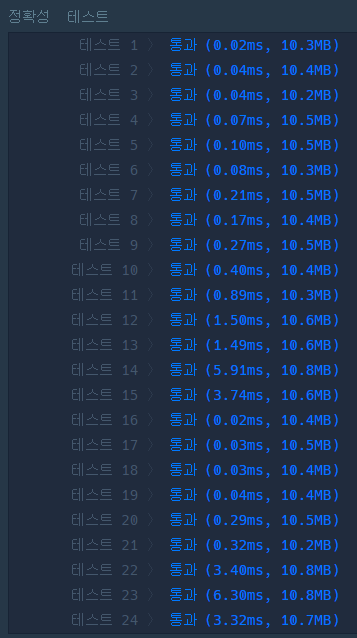

In [ ]:
from heapq import heappush, heappop

# HH:MM => Minute
def time2min(value):
    tmp = value.split(':')
    return int(tmp[0])*60 + int(tmp[1])

def solution(plans):
    answer = []
    wait_queue = []
    cplans = []

    for i in range(len(plans)):
        pn, st, lt = plans[i]
        st = time2min(st)
        lt = int(lt)

        heappush(cplans, (st, lt, pn))

    # 최소 힙
    while len(cplans) >= 2:
        st, lt, pn = heappop(cplans)
        nst, nlt, npn = heappop(cplans)

        # 종료 시간이 다음 실행시간보다 작/같 일 때
        if st + lt <= nst:
            answer.append(pn)
            waste_time = nst - (st + lt)


            # 시간 남으면 나머지 처리
            while waste_time and wait_queue:
                rst, rlt, rpn = heappop(wait_queue)

                if rlt <= waste_time:
                    answer.append(rpn)
                    waste_time -= rlt
                else:
                    heappush(wait_queue, (rst, (rlt-waste_time), rpn))
                    waste_time = 0

        # 종료 시간이 다음 실행시간보다 클 때
        else:
            heappush(wait_queue, (-st, lt-(nst-st), pn))

        heappush(cplans, (nst, nlt, npn))

    last = heappop(cplans)
    answer.append(last[2])

    while wait_queue:
        remain = heappop(wait_queue)
        answer.append(remain[2])

    return answer

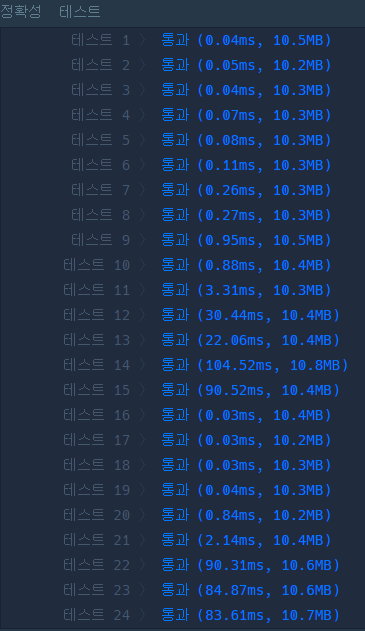

In [172]:
def solution(plans):
    plans = sorted(map(lambda x: [x[0], int(x[1][:2]) * 60 + int(x[1][3:]), int(x[2])], plans), key=lambda x: -x[1])
    print(plans)
    lst = []
    while plans:
        x = plans.pop()
        for i, v in enumerate(lst):
            if v[0] > x[1]:
                lst[i][0] += x[2]
        lst.append([x[1] + x[2], x[0]])
    lst.sort()

    return list(map(lambda x: x[1], lst))

In [173]:
plans =[["a", "09:00", "30"], ["b", "09:20", "10"], ["c", "09:40", "10"]]
solution(plans)

[['c', 580, 10], ['b', 560, 10], ['a', 540, 30]]


['b', 'a', 'c']

In [169]:
plans = [["korean", "11:40", "30"], ["english", "12:10", "20"], ["math", "12:30", "40"]]
solution(plans)

['korean', 'english', 'math']

In [170]:
plans = [["aaa", "12:00", "20"], ["bbb", "12:10", "30"], ["ccc", "12:40", "10"]]
solution(plans)

['bbb', 'ccc', 'aaa']

In [171]:
plans = [["science", "12:40", "50"], ["music", "12:20", "40"], ["history", "14:00", "30"], ["computer", "12:30", "100"]]
solution(plans)

['science', 'history', 'computer', 'music']